<a href="https://colab.research.google.com/github/shanto-swe029/cgi/blob/main/tasks/task_01/BresenhamsAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
def plot_line_low(x0, y0, x1, y1):
    dx, dy = x1 - x0, y1 - y0
    yi = 1
    if dy < 0:
        yi = -1
        dy = -dy
    D = (2 * dy) - dx
    y = y0

    points = []
    for x in range(x0, x1 + 1):
        points.append((x, y))
        if D > 0:
            y = y + yi
            D = D - (2 * dx)
        D = D + (2 * dy)
    return points

In [6]:
def plot_line_high(x0, y0, x1, y1):
    dx = x1 - x0
    dy = y1 - y0
    xi = 1
    if dx < 0:
        xi = -1
        dx = -dx
    D = (2 * dx) - dy
    x = x0

    points = []
    for y in range(y0, y1 + 1):
        points.append((x, y))
        if D > 0:
            x = x + xi
            D = D - (2 * dy)
        D = D + (2 * dx)
    return points

In [7]:
def bresenham_line(x0, y0, x1, y1):
    if abs(y1 - y0) < abs(x1 - x0):
        if x0 > x1:
            return plot_line_low(x1, y1, x0, y0)
        else:
            return plot_line_low(x0, y0, x1, y1)
    else:
        if y0 > y1:
            return plot_line_high(x1, y1, x0, y0)
        else:
            return plot_line_high(x0, y0, x1, y1)

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [9]:
def draw_pixels(points):
    fig, ax = plt.subplots()
    pixel_size = 1

    ax.set_xlim(0, max(points, key=lambda x: x[0])[0] + 1)
    ax.set_ylim(0, max(points, key=lambda x: x[1])[1] + 1)
    ax.set_xticks(range(max(points, key=lambda x: x[0])[0] + 2))
    ax.set_yticks(range(max(points, key=lambda x: x[1])[1] + 2))
    ax.grid(True, which='both')

    point1, point2, first_pass = None, None, True

    for point in points:
        if first_pass:
            point1 = point
            first_pass = False
        else:
            point2 = point
        square = Rectangle((point[0] - 1, point[1] - 1), pixel_size, pixel_size, facecolor="blue")
        ax.add_patch(square)

    ax.set_title(f"Line from {point1} to {point2}")

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

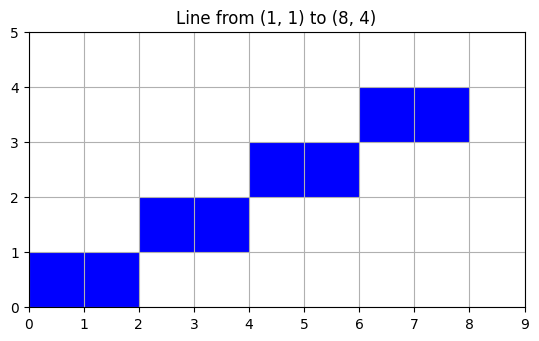

In [12]:
points = bresenham_line(1, 1, 8, 4)
draw_pixels(points)

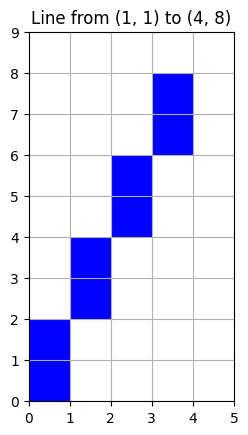

In [13]:
points = bresenham_line(1, 1, 4, 8)
draw_pixels(points)

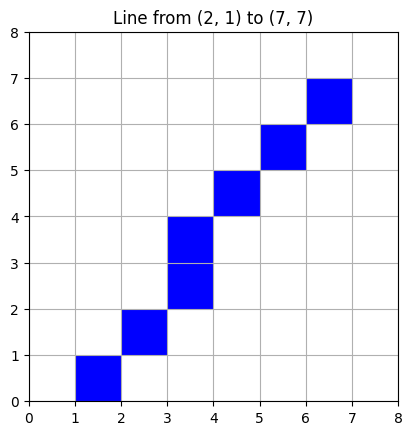

In [14]:
points = bresenham_line(2, 1, 7, 7)
draw_pixels(points)

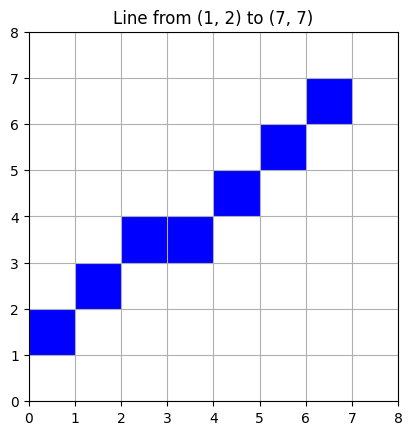

In [15]:
points = bresenham_line(1, 2, 7, 7)
draw_pixels(points)